Jerusalem Light Rail Isochrone Walking Map
Omer Galer

Inspired by [Elad Alfassa](https://github.com/elad661/metroTLV_walkshed) and based on [Geoff Boeing](https://github.com/gboeing/osmnx)

In [58]:
# install the OSMnx package to manipulate OpenStreetMap data using conda
# !conda create -n ox -c conda-forge --strict-channel-priority osmnx

Download and prep the street network 

Load station locations using geojson, from geo.mot.gov.il

In [59]:
# # project the graph to UTM
# # gdf_nodes = ox.graph_to_gdfs(graph, edges=False)
# projected_graph = ox.project_graph(G)

# # get one color for each isochrone
# iso_colors = ox.plot.get_colors(n=len(trip_times), cmap="plasma", start=0, return_hex=True)

Plot time-distance isochrones

In [60]:
!pip install geopandas osmnx shapely folium matplotlib
import geopandas as gpd
import osmnx as ox
import networkx as nx
import folium
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from shapely.geometry import Point, Polygon, MultiPolygon, LineString
import shapely.geometry
from descartes import PolygonPatch
from shapely.ops import unary_union
from shapely.geometry import mapping
from shapely.geometry import MultiPolygon
import json 
from shapely import MultiLineString

In [61]:
# Load the GeoJSON files
stations = gpd.read_file('./data/jlem_lrt_stations.geojson')
lines = gpd.read_file('./data/jlem_lrt_lines.geojson')


In [62]:
# Define the location
place_name = "Jerusalem, Israel"

# Retrieve the street network for Jerusalem
G = ox.graph_from_place(place_name, network_type='walk')


In [63]:
# find the centermost node and then project the graph to UTM
gdf_nodes = ox.graph_to_gdfs(G, edges=False)
x, y = gdf_nodes["geometry"].unary_union.centroid.xy
center_node = ox.distance.nearest_nodes(G, x[0], y[0])
G = ox.project_graph(G)

C:\Users\omerg\AppData\Local\Temp\ipykernel_3292\2259039439.py:3: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  x, y = gdf_nodes["geometry"].unary_union.centroid.xy


In [64]:
# add an edge attribute for time in minutes required to traverse each edge
meters_per_minute = 4.5 * 1000 / 60  # km per hour to m per minute
for _, _, _, data in G.edges(data=True, keys=True):
    data["time"] = data["length"] / meters_per_minute
trip_times = [5, 10, 15, 20]

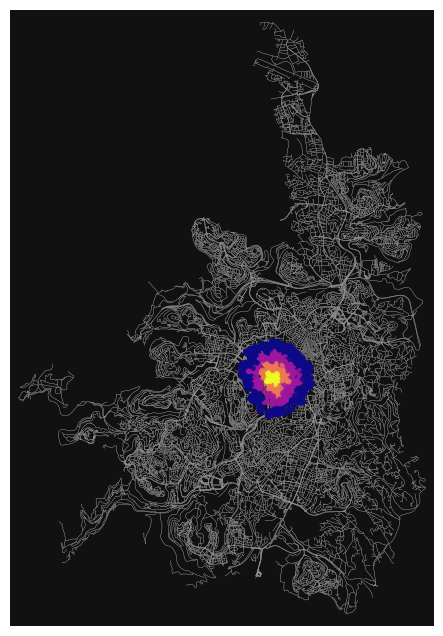

In [65]:
# get one color for each isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap="plasma", start=0)
# color the nodes according to isochrone then plot the street network
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance="time")
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else "none" for node in G.nodes()]
ns = [15 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(
    G,
    node_color=nc,
    node_size=ns,
    node_alpha=0.8,
    edge_linewidth=0.2,
    edge_color="#999999",
)

In [66]:

# Load the filtered GeoJSON files
stations_jerusalem = gpd.read_file('./data/jlem_lrt_stations.geojson')
lines_jerusalem = gpd.read_file('./data/jlem_lrt_lines.geojson')

# Define the location and network type
place = "Jerusalem, Israel"
network_type = 'walk'

# Define travel speed in km per hour
travel_speed = 4.5

# Define the isochrone time intervals (in minutes)
trip_times = [5, 10, 15, 20]

# Get one color for each isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap="plasma", start=0)

# Download the street network
G = ox.graph_from_place(place, network_type=network_type)

# Project the graph to UTM
G = ox.project_graph(G)


In [67]:
stations_jerusalem

,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,icon,snippet,geometry
0,המור,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",None,None,None,clampToGround,-1,0,-1,None,None,,POINT Z (35.20037 31.73233 0)
1,דב יוסף,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",None,None,None,clampToGround,-1,0,-1,None,None,,POINT Z (35.19589 31.73282 0)
2,שמואל מאיר,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",None,None,None,clampToGround,-1,0,-1,None,None,,POINT Z (35.21117 31.73744 0)
3,גבעת המטוס,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",None,None,None,clampToGround,-1,0,-1,None,None,,POINT Z (35.21312 31.74054 0)
4,ברעם,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",None,None,None,clampToGround,-1,0,-1,None,None,,POINT Z (35.21661 31.7454 0)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,רכס לבן,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",None,None,None,clampToGround,-1,0,-1,None,None,,POINT Z (35.1556 31.75134 0)
122,רכס לבן,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",None,None,None,clampToGround,-1,0,-1,None,None,,POINT Z (35.15839 31.75324 0)
123,רכס לבן,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",None,None,None,clampToGround,-1,0,-1,None,None,,POINT Z (35.16019 31.75571 0)
124,גטי,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",None,None,None,clampToGround,-1,0,-1,None,None,,POINT Z (35.18406 31.74892 0)


In [68]:
graph_gdf = ox.graph_to_gdfs(G, nodes=True, edges=False)

# make sure the stns are the same coord system
stations_jerusalem = stations_jerusalem.to_crs(graph_gdf.crs)
lines_jerusalem = lines_jerusalem.to_crs(graph_gdf.crs)

In [69]:
# Collect nodes cloesest to each LRT station #TODO: Refactor needed??
lrt_station_nodes = []
for feature in tqdm(stations_jerusalem.iterrows(), 'loading stations'):
    coords = feature[1]['geometry'].coords#['coordinates']
    # properties = feature[1]['properties']
    node = ox.distance.nearest_nodes(G, float(coords.xy[0][0]), float(coords.xy[1][0]))
    lrt_station_nodes.append({ "node": node})#??, "properties": properties })
print(f'loaded {len(lrt_station_nodes)} LRT station locations')

loading stations: 126it [00:11, 10.63it/s]

loaded 126 LRT station locations


In [70]:
# Add an edge attribute for time in minutes required to traverse each edge
meters_per_minute = travel_speed * 1000 / 60  # km per hour to m per minute
for _, _, _, data in G.edges(data=True, keys=True):
    data["time"] = data["length"] / meters_per_minute


In [71]:
# gdf_nodes = ox.graph_to_gdfs(graph, edges=False)
projected_graph = ox.project_graph(G)
# get one color for each isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap="plasma", start=0, return_hex=True)

C:\Users\omerg\AppData\Local\Temp\ipykernel_3292\843759569.py:4: FutureWarning: The `return_hex` parameter has been deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  iso_colors = ox.plot.get_colors(n=len(trip_times), cmap="plasma", start=0, return_hex=True)


In [126]:
# Plot the street network
# ox.plot_graph(G, ax=ax, show=False, close=False, edge_color="#999999", edge_linewidth=0.2)

def isochronate(G, center_node, edge_buff=25, node_buff=50, infill=False):
    isochrone_polys = {}
    for trip_time in sorted(trip_times, reverse=True):
        subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance="time")

        node_points = [Point((data["x"], data["y"])) for node, data in subgraph.nodes(data=True)]
        nodes_gdf = gpd.GeoDataFrame({"id": list(subgraph.nodes)}, geometry=node_points)
        nodes_gdf = nodes_gdf.set_index("id")

        edge_lines = []
        for n_fr, n_to in subgraph.edges():
            f = nodes_gdf.loc[n_fr].geometry
            t = nodes_gdf.loc[n_to].geometry
            edge_lookup = G.get_edge_data(n_fr, n_to)[0].get("geometry", LineString([f, t]))
            edge_lines.append(edge_lookup)

        n = nodes_gdf.buffer(node_buff).geometry
        e = gpd.GeoSeries(edge_lines).buffer(edge_buff).geometry
        all_gs = list(n) + list(e)
        new_iso = gpd.GeoSeries(all_gs).unary_union

        # try to fill in surrounded areas so shapes will appear solid and
        # blocks without white space inside them
        if infill and hasattr(new_iso, 'exterior'):
            new_iso = Polygon(new_iso.exterior)
        isochrone_polys[trip_time] = new_iso
    return isochrone_polys

# def get_geojson_geometry(polygon):
#     """Get geojson-compatible geometry, projected to a useful CRS"""
#     return shapely.geometry.mapping(ox.projection.project_geometry(polygon, crs=projected_graph.graph['crs'], to_latlong=True)[0])

In [73]:

def get_geojson_geometry(polygon):
    """Get geojson-compatible geometry."""
    return mapping(polygon)

In [74]:
# Generate isochrone polygons, grouped by time
lrt_time_polys = { key: [] for key in trip_times }

for station in tqdm(lrt_station_nodes, 'making polys'):
    isochrone_polys = isochronate(projected_graph, station['node'], edge_buff=25, node_buff=0, infill=True)
    for time, polygon in isochrone_polys.items():
        lrt_time_polys[time].append({ 'poly': polygon})#, 'properties': { **station['properties'], 'time': time }})

making polys:   0%|          | 0/126 [00:00<?, ?it/s]C:\Users\omerg\AppData\Local\Temp\ipykernel_3292\3525090258.py:23: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  new_iso = gpd.GeoSeries(all_gs).unary_union
C:\Users\omerg\AppData\Local\Temp\ipykernel_3292\3525090258.py:23: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  new_iso = gpd.GeoSeries(all_gs).unary_union
C:\Users\omerg\AppData\Local\Temp\ipykernel_3292\3525090258.py:23: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  new_iso = gpd.GeoSeries(all_gs).unary_union
C:\Users\omerg\AppData\Local\Temp\ipykernel_3292\3525090258.py:23: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  new_iso = gpd.GeoSeries(all_gs).unary_union
making polys:   1%|          | 1/126 [00:03<06:43,  3.23s/it]C:\Users\omerg\AppData\Local\T

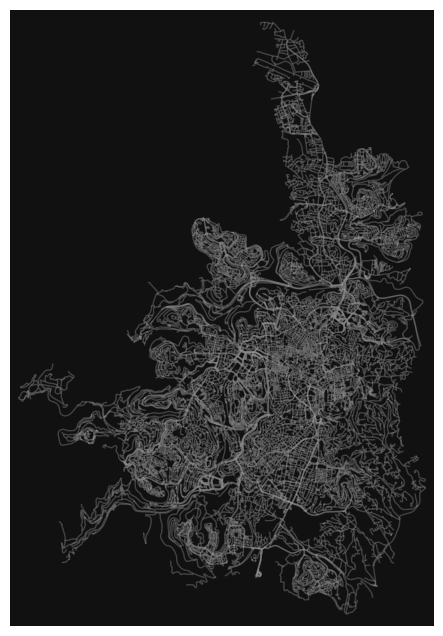

In [75]:
z_index = { key: value for key, value in zip(trip_times, sorted(trip_times, reverse=True)) }
fig, ax = ox.plot_graph(
    projected_graph, show=False, close=False, edge_color="#999999", edge_alpha=0.2, node_size=0
)

In [76]:
# lines_jerusalem
colours = {"אדום": "red", "ירוק": "green", "ירוק בהיר": "limegreen", "כחול": "blue", "כחול בהיר": "deepskyblue", "סגול": "purple", "כתום": "orange", "צהוב" :"yellow"}

Drawing for 20
Drawing for 15
Drawing for 10
Drawing for 5


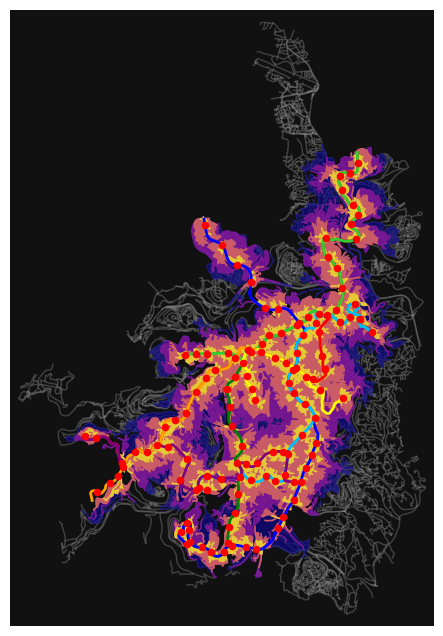

In [77]:



fig, ax = ox.plot_graph(
    projected_graph, show=False, close=False, edge_color="#999999", edge_alpha=0.2, node_size=0
)
geojson_features = []

for [time, polys], fc in zip(reversed(lrt_time_polys.items()), iso_colors):
    print(f'Drawing for {time}')
    union = shapely.ops.unary_union([poly['poly'] for poly in polys])
    if isinstance(union, Polygon):
        union = [union]  # Make it iterable if it's a single Polygon
    elif isinstance(union, MultiPolygon):
        union = list(union.geoms)  
    else:
        union = []

    for polygon in union:
        geojson_features.append({
            "type": "Feature", 
            "properties": { "time": time, "color": fc }, 
            "geometry": get_geojson_geometry(polygon)
        })
        patch = PolygonPatch(polygon, fc=fc, ec="none", alpha=0.7, zorder=z_index[time])
        ax.add_patch(patch)

geojson = { "type": "FeatureCollection", "features": geojson_features }
with open('./jlem_lrt_dist_iso.geojson', 'w') as f:
    json.dump(geojson, f)

#plot the lines 
for _, row in lines_jerusalem.iterrows():
    colour = colours.get(row['Name'], 'black')  # Default to black if no colour found
    if isinstance(row.geometry, LineString):
        gpd.GeoSeries([row.geometry]).plot(ax=ax, linewidth=2, zorder=21, color=colour)
    elif isinstance(row.geometry, MultiLineString):
        for line in row.geometry.geoms:
            gpd.GeoSeries([line]).plot(ax=ax, linewidth=2, zorder=21, color=colour)

stations_jerusalem.plot(ax=ax, color='red', markersize=20, zorder=22)
plt.show()


In [79]:
# Reproject isochrones
geojson_stns_proj = geojson_features
# Create a GeoDataFrame from the geojson_features
gdf = gpd.GeoDataFrame.from_features(geojson_stns_proj, crs="EPSG:32636")

# Reproject the GeoDataFrame to EPSG:4326
gdf = gdf.to_crs(epsg=4326)

# Convert the reprojected GeoDataFrame back to a GeoJSON-like structure
reprojected_geojson_features = json.loads(gdf.to_json())

# Save the reprojected GeoJSON to disk
with open('./jlem_lrt_dist_iso_reprojected.geojson', 'w') as f:
    json.dump(reprojected_geojson_features, f)

In [84]:
#add a colour property to each line
lines_jerusalem['colour'] = lines_jerusalem['Name'].map(colours)

def get_line_geojson(line_df):
    features = []
    for _, row in line_df.iterrows():
        colour = row['colour']  # Retrieve color from the dataframe
        geom = shapely.geometry.mapping(row.geometry)
        features.append({
            "type": "Feature",
            "properties": {"color": colour},
            "geometry": geom
        })
    return {"type": "FeatureCollection", "features": features}

line_geojson = get_line_geojson(lines_jerusalem)


# Reproject lines
line_geojson_proj = line_geojson
# Create a GeoDataFrame from the geojson_features
gdf = gpd.GeoDataFrame.from_features(line_geojson_proj, crs="EPSG:32636")
# Reproject the GeoDataFrame to EPSG:4326
gdf = gdf.to_crs(epsg=4326)
# Convert the reprojected GeoDataFrame back to a GeoJSON-like structure
reproj_line_geojson = json.loads(gdf.to_json())

# Save the reprojected GeoJSON to disk
with open('./data/jlem_lrt_lines_clr.geojson', 'w') as f:
    json.dump(reproj_line_geojson, f)


In [93]:

# Ensure the GeoDataFrame is in the desired projection
# Example: Project to WGS84 (EPSG:4326)
stations_jerusalem = stations_jerusalem.to_crs(epsg=4326)

# Save to CSV
stations_jerusalem.to_csv('stations_jlem.csv', encoding="utf-8-sig")

# gdf.to_csv("stations_jlem.csv", encoding="utf-8-sig")

Isochrones for individual lines

In [127]:
#keep track of what line(s) stop at what stations
jlem_stations_lines = gpd.read_file("stations_jlem.csv")
jlem_stations_lines = jlem_stations_lines[["red", "green", "blue", "purple", "orange", "yellow"]]
new_df = stations_jerusalem.join(jlem_stations_lines)
new_df

,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,icon,snippet,geometry,red,green,blue,purple,orange,yellow
0,המור,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",None,None,None,clampToGround,-1,0,-1,None,None,,POINT Z (35.20037 31.73233 0),0,0,1,0,0,0
1,דב יוסף,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",None,None,None,clampToGround,-1,0,-1,None,None,,POINT Z (35.19589 31.73282 0),0,0,1,0,0,0
2,שמואל מאיר,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",None,None,None,clampToGround,-1,0,-1,None,None,,POINT Z (35.21117 31.73744 0),0,0,1,0,0,0
3,גבעת המטוס,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",None,None,None,clampToGround,-1,0,-1,None,None,,POINT Z (35.21312 31.74054 0),0,0,1,0,0,0
4,ברעם,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",None,None,None,clampToGround,-1,0,-1,None,None,,POINT Z (35.21661 31.7454 0),0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,רכס לבן,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",None,None,None,clampToGround,-1,0,-1,None,None,,POINT Z (35.1556 31.75134 0),0,0,0,0,1,0
122,רכס לבן,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",None,None,None,clampToGround,-1,0,-1,None,None,,POINT Z (35.15839 31.75324 0),0,0,0,0,1,0
123,רכס לבן,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",None,None,None,clampToGround,-1,0,-1,None,None,,POINT Z (35.16019 31.75571 0),0,0,0,0,1,0
124,גטי,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",None,None,None,clampToGround,-1,0,-1,None,None,,POINT Z (35.18406 31.74892 0),0,0,0,1,0,0


In [124]:
for stn in new_df.iterrows():
    # print(stn[1])
    if stn[1]["yellow"] == "1":
        print(stn[1]["Name"])
    

שלומציון המלכה
ממילא
שער האשפות
מוזיאון ישראל
הכנסת
בית המשפט
הדוידקה
יפו מרכז
הטורים
מחנה יהודה
ביטוח לאומי
בנייני האומה


In [144]:
line_stn_nodes

[]

loaded 12 LRT stations on yellow line


making polys:   0%|          | 0/12 [00:00<?, ?it/s]C:\Users\omerg\AppData\Local\Temp\ipykernel_3292\3388671307.py:23: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  new_iso = gpd.GeoSeries(all_gs).unary_union
C:\Users\omerg\AppData\Local\Temp\ipykernel_3292\3388671307.py:23: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  new_iso = gpd.GeoSeries(all_gs).unary_union
C:\Users\omerg\AppData\Local\Temp\ipykernel_3292\3388671307.py:23: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  new_iso = gpd.GeoSeries(all_gs).unary_union
C:\Users\omerg\AppData\Local\Temp\ipykernel_3292\3388671307.py:23: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  new_iso = gpd.GeoSeries(all_gs).unary_union
making polys:   8%|▊         | 1/12 [00:00<00:01,  9.40it/s]C:\Users\omerg\AppData\Local\Tem

Drawing for 20
Drawing for 15
Drawing for 10
Drawing for 5


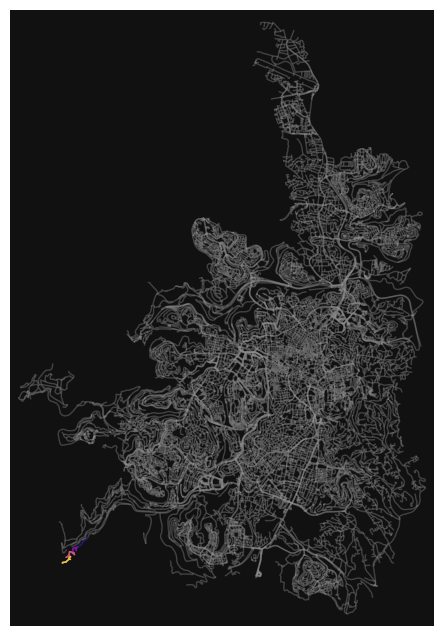

In [140]:
line_stn_nodes = []
lines = ["צהוב"]

# lineDict = {"אדום": "red", "ירוק": "green", "ירוק בהיר": "green", "כחול": "blue", "כחול בהיר": "blue", "סגול": "purple", "כתום": "orange", "צהוב": "yellow"}
lineDict = {"צהוב": "yellow"}
lrt_station_nodes = []
for (lineHE, lineGB)  in lineDict.items():
    for feature in new_df.iterrows():
        if feature[1][lineGB] == "0":
            continue
        coords = feature[1]['geometry'].coords
        node = ox.distance.nearest_nodes(G, float(coords.xy[0][0]), float(coords.xy[1][0]))
        lrt_station_nodes.append({"node": node})
    
    print(f'loaded {len(lrt_station_nodes)} LRT stations on {lineGB} line')
    
    #generate isochrones for each individual line 
    lrt_time_polys = {key: [] for key in trip_times}

    for station in tqdm(lrt_station_nodes, 'making polys'):
        isochrone_polys = isochronate(projected_graph, station['node'], edge_buff=25, node_buff=0, infill=True)
        for time, polygon in isochrone_polys.items():
            lrt_time_polys[time].append({'poly': polygon}) #, 'properties': { **station['properties'], 'time': time }})
    fig, ax = ox.plot_graph(
    projected_graph, show=False, close=False, edge_color="#999999", edge_alpha=0.2, node_size=0
    )
    geojson_features = []

    for [time, polys], fc in zip(reversed(lrt_time_polys.items()), iso_colors):
        print(f'Drawing for {time}')
        union = shapely.ops.unary_union([poly['poly'] for poly in polys])
        if isinstance(union, Polygon):
            union = [union]  # Make it iterable if it's a single Polygon
        elif isinstance(union, MultiPolygon):
            union = list(union.geoms)  
        else:
            union = []

        for polygon in union:
            geojson_features.append({
                "type": "Feature", 
                "properties": {"time": time, "color": fc}, 
                "geometry": get_geojson_geometry(polygon)
            })
            patch = PolygonPatch(polygon, fc=fc, ec="none", alpha=0.7, zorder=z_index[time])
            ax.add_patch(patch)

plt.show()
# geojson = { "type": "FeatureCollection", "features": geojson_features }
# with open('./jlem_lrt_dist_iso.geojson', 'w') as f:
    # json.dump(geojson, f)


Drawing for 20
Drawing for 15
Drawing for 10
Drawing for 5


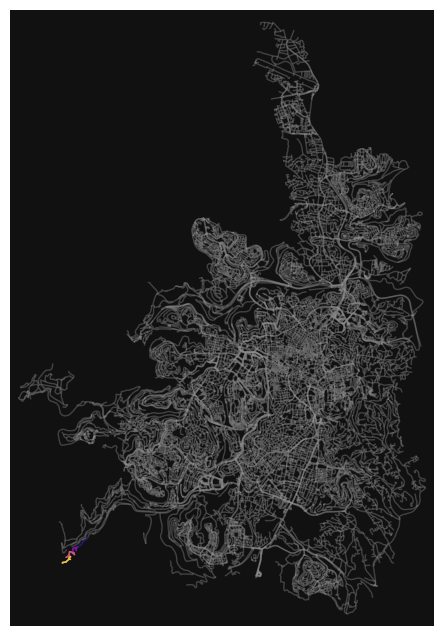

In [ ]:

#         # Reproject isochrones
# geojson_stns_proj = geojson_features
# # Create a GeoDataFrame from the geojson_features
# gdf = gpd.GeoDataFrame.from_features(geojson_stns_proj, crs="EPSG:32636")

# # Reproject the GeoDataFrame to EPSG:4326
# gdf = gdf.to_crs(epsg=4326)

# # Convert the reprojected GeoDataFrame back to a GeoJSON-like structure
# reprojected_geojson_features = json.loads(gdf.to_json())

# # Save the reprojected GeoJSON to disk
# with open('./jlem_lrt_dist_iso_reprojected.geojson', 'w') as f:
#     json.dump(reprojected_geojson_features, f)

In [78]:
# import geopandas as gpd
# import json

# # Load your existing GeoJSON files
# with open('jlem_lrt_dist_iso.geojson') as f:
#     isochrones_geojson = json.load(f)


# # Convert GeoDataFrames to GeoJSON
# stations_geojson = json.loads(stations_jerusalem.to_json())
# lines_geojson = json.loads(lines_jerusalem.to_json())
# # Extract features
# isochrone_features = isochrones_geojson['features']
# station_features = stations_geojson['features']
# line_features = lines_geojson['features']

# # Combine features
# all_features = isochrone_features + station_features + line_features

# # Create a new GeoJSON structure
# combined_geojson = {
#     "type": "FeatureCollection",
#     "features": all_features
# }

# # Save the combined GeoJSON
# with open('combined_map1.geojson', 'w') as f:
#     json.dump(combined_geojson, f)
